In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # 訓練データとテストデータに分割
from sklearn.metrics import confusion_matrix # 混合行列

from sklearn.decomposition import PCA #主成分分析
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression # ロジスティック回帰

from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

# 赤ワインについてのロジスティック回帰分析

## データの確認

In [2]:
df_red = pd.read_csv('wine+quality/winequality-red.csv', header=0, delimiter=';')

In [3]:
df_red['class'] = [0 if i <= 5 else 1 for i in df_red['quality'].tolist()]
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [19]:
# それぞれに与える色を決める。
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df_red['class'].tolist()]

X = df_red.iloc[:, :11] # 説明変数
y = df_red.iloc[:, 12] # 目的変数

scaler = StandardScaler() # 特徴量データの標準化
X = scaler.fit_transform(X)
print(X.shape)
print(y.sum())
print(y.sum()/X.shape[0] *100)

(1599, 11)
855
53.47091932457786


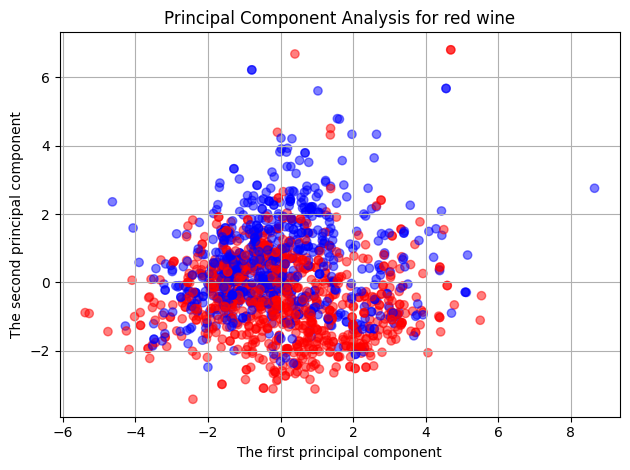

In [5]:
pca = PCA()
pca.fit(X)

# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(X)

# 図示
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis for red wine")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.tight_layout()
plt.savefig("fig/PCA_red.pdf")

## 学習 & 評価

100 回 同様の学習を行うことで，各種スコアとその誤差を求めた．

In [6]:
Nexp = 100
accuracy_arr = np.array([])
precision_arr = np.array([])
recall_arr = np.array([])
f1_arr = np.array([])
specificity_arr = np.array([])
roc_auc_red_arr = np.array([])

for i in range(Nexp):
    # 訓練データ・テストデータへのランダムな分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i, shuffle=True)
    
    clf = LogisticRegression() #モデルの生成
    clf.fit(X_train, y_train) #学習
    
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    accuracy_arr = np.append(accuracy_arr, accuracy_score(y_test, y_pred))
    precision_arr = np.append(precision_arr, precision_score(y_test, y_pred))
    recall_arr = np.append(recall_arr, recall_score(y_test, y_pred))
    f1_arr = np.append(f1_arr, f1_score(y_test, y_pred))
    roc_auc_red_arr = np.append(roc_auc_red_arr, roc_auc_score(y_test, y_pred_proba))

    con_red = pd.DataFrame(confusion_matrix(y_pred, y_test), \
             index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])
    specificity_arr = np.append(specificity_arr, con_red.iloc[0,0]/(con_red.iloc[0,0] + con_red.iloc[1,0]))


print(accuracy_arr.mean(), precision_arr.mean(), recall_arr.mean(), f1_arr.mean(), specificity_arr.mean(), roc_auc_red_arr.mean())
print(accuracy_arr.std()/np.sqrt(Nexp), precision_arr.std()/np.sqrt(Nexp), recall_arr.std()/np.sqrt(Nexp), \
      f1_arr.std()/np.sqrt(Nexp), specificity_arr.std()/np.sqrt(Nexp), roc_auc_red_arr.std()/np.sqrt(Nexp))

0.7385937500000002 0.7623864582235933 0.7448102031365597 0.75275741990629 0.7319297183071868 0.8135891256929719
0.00209089123865279 0.003321337231089824 0.0033272211396466202 0.0023557364258019677 0.0036038393191003214 0.002116800830442942


0.8135891256929719


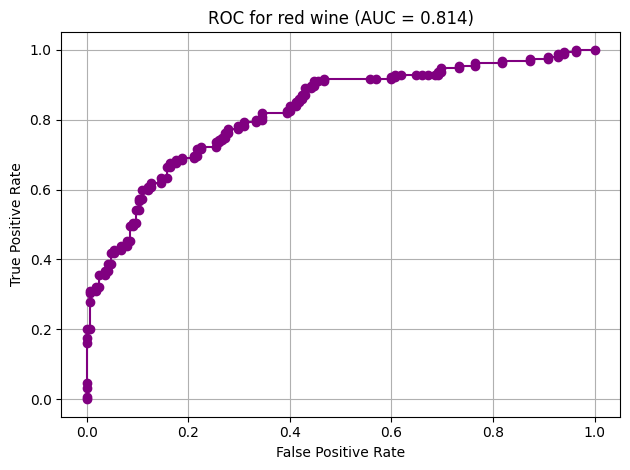

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='o', color='purple')
plt.grid()
plt.title(f"ROC for red wine (AUC = {roc_auc_red_arr.mean():.3f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.savefig("fig/ROC_red.pdf")
print(roc_auc_red_arr.mean())

# 白ワインについてのロジスティック回帰分析

## データの確認

In [8]:
# 白ワインについても同様の解析を行う
df_white = pd.read_csv('wine+quality/winequality-white.csv', header=0, delimiter=';')

(4898, 11)
3258
66.51694569211924


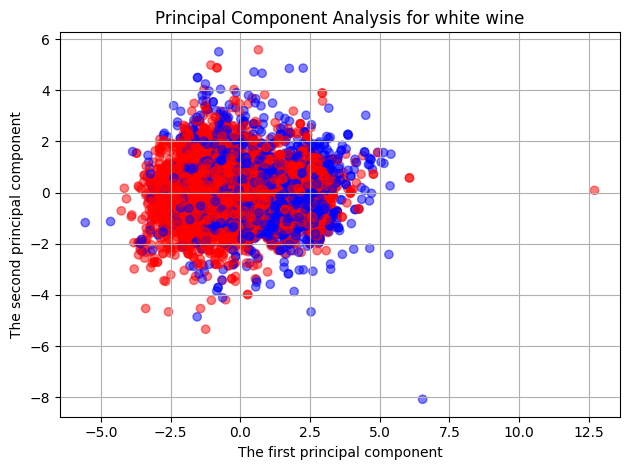

In [18]:
df_white['class'] = [0 if i <= 5 else 1 for i in df_white['quality'].tolist()]
color_codes = {0:'#0000FF', 1:'#FF0000'}
colors = [color_codes[x] for x in df_white['class'].tolist()]

X = df_white.iloc[:, :11] # 説明変数
y = df_white.iloc[:, 12] # 目的変数

scaler = StandardScaler() # 特徴量データの標準化
X = scaler.fit_transform(X)
print(X.shape)
print(y.sum())
print(y.sum()/X.shape[0] *100)

pca = PCA()
pca.fit(X)

# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(X)

# 図示
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.5, color=colors)
plt.title("Principal Component Analysis for white wine")
plt.xlabel("The first principal component")
plt.ylabel("The second principal component")
plt.grid()
plt.tight_layout()
plt.savefig("fig/PCA_white.pdf")

## 学習 & 評価

In [10]:
accuracy_arr = np.array([])
precision_arr = np.array([])
recall_arr = np.array([])
f1_arr = np.array([])
specificity_arr = np.array([])
roc_auc_white_arr = np.array([])

for i in range(Nexp):
    # 訓練データ・テストデータへのランダムな分割
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i+Nexp, shuffle=True)
    clf = LogisticRegression() #モデルの生成
    clf.fit(X_train, y_train) #学習
    
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    
    accuracy_arr = np.append(accuracy_arr, accuracy_score(y_test, y_pred))
    precision_arr = np.append(precision_arr, precision_score(y_test, y_pred))
    recall_arr = np.append(recall_arr, recall_score(y_test, y_pred))
    f1_arr = np.append(f1_arr, f1_score(y_test, y_pred))
    roc_auc_white_arr = np.append(roc_auc_white_arr, roc_auc_score(y_test, y_pred_proba))

    con_white = pd.DataFrame(confusion_matrix(y_pred, y_test), \
             index=['predicted 0', 'predicted 1'], columns=['real 0', 'real 1'])
    specificity_arr = np.append(specificity_arr, con_white.iloc[0,0]/(con_white.iloc[0,0] + con_white.iloc[1,0]))


print(accuracy_arr.mean(), precision_arr.mean(), recall_arr.mean(), f1_arr.mean(), specificity_arr.mean(), roc_auc_white_arr.mean())
print(accuracy_arr.std()/np.sqrt(Nexp), precision_arr.std()/np.sqrt(Nexp), recall_arr.std()/np.sqrt(Nexp), \
      f1_arr.std()/np.sqrt(Nexp), specificity_arr.std()/np.sqrt(Nexp), roc_auc_white_arr.std()/np.sqrt(Nexp))

0.7522857142857141 0.7791891352221925 0.8771187978542554 0.8250807625592276 0.503453920755376 0.8023087070949777
0.0012463290536428107 0.001623137694840714 0.0014565225327336558 0.000991993912046265 0.0027084073247509535 0.0011646173719044644


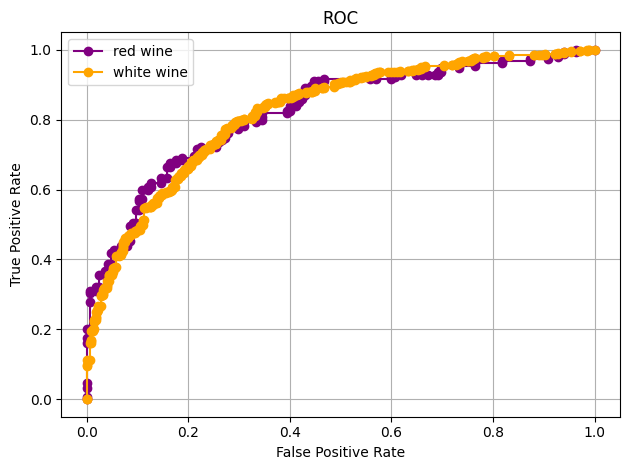

In [20]:
fpr_w, tpr_w, thresholds_w = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, marker='o', label=f"red wine", color='purple')
plt.plot(fpr_w, tpr_w, marker='o', label=f"white wine", color='orange')
plt.grid()
plt.title(f"ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.savefig("fig/ROC.pdf")